In [324]:
import pandas as pd
import numpy as np
import os
import statistics as stat
import seaborn as sns
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')



path = "../Data/"
dir_list = os.listdir(path)
train_data_list = {}
test_data_list={}
dir_list = dir_list[1:]

name1 = ['Time','Avg_RSS12', 'Var_RSS12', 'Avg_RSS13', 'Var_RSS13', 'Avg_RSS23', 'Var_RSS23', 'x']
name2 = ['Time','Avg_RSS12', 'Var_RSS12', 'Avg_RSS13', 'Var_RSS13', 'Avg_RSS23', 'Var_RSS23']
for direc in dir_list:
    file_list = os.listdir(path + direc)
    for file in file_list:
        if direc == "bending1" and (file == "dataset1.csv" or file == "dataset2.csv"):
            test_data_list[direc + "_" + file] = pd.read_csv(path + direc + "/" + file, delimiter=",", skiprows=5, names=name2)
        elif direc == "bending2" and (file == "dataset1.csv" or file == "dataset2.csv"):
            test_data_list[direc + "_" + file] = pd.read_csv(path + direc + "/" + file, delimiter=",", skiprows=5, names=name2)
        elif direc == "cycling" and (file =="dataset1.csv" or file == "dataset2.csv" or file == "dataset3.csv"):
            test_data_list[direc + "_" + file] = pd.read_csv(path + direc + "/" + file, delimiter=",", skiprows=5, names=name2)
        elif direc == "walking" and (file =="dataset1.csv" or file == "dataset2.csv" or file == "dataset3.csv"):
            test_data_list[direc + "_" + file] = pd.read_csv(path + direc + "/" + file, delimiter=",", skiprows=5, names=name2)
        elif direc == "sitting" and (file =="dataset1.csv" or file == "dataset2.csv" or file == "dataset3.csv"):
            test_data_list[direc + "_" + file] = pd.read_csv(path + direc + "/" + file, delimiter=",", skiprows=5, names=name2)
        elif direc == "standing" and (file =="dataset1.csv" or file == "dataset2.csv" or file == "dataset3.csv"):
            test_data_list[direc + "_" + file] = pd.read_csv(path + direc + "/" + file, delimiter=",", skiprows=5, names=name2)
        elif direc == "lying" and (file =="dataset1.csv" or file == "dataset2.csv" or file == "dataset3.csv"):
            test_data_list[direc + "_" + file] = pd.read_csv(path + direc + "/"+ file, delimiter=",", skiprows=5, names=name2)
        elif direc == "bending2" and file == "dataset4.csv":
            train_data_list[direc + "_" + file] = pd.read_csv(path + "bending2/dataset4.csv", delimiter=" ", skiprows=5, names=name1).drop(["x"], axis=1)
        else:
            train_data_list[direc + "_" + file] = pd.read_csv(path + direc + "/" + file, delimiter=",", skiprows=5, names=name2)

#train_data_list
#print(train_data_list["bending2_dataset4.csv"])

## (c)ii.

In [325]:
all_data_list={}
for direc in dir_list:
    file_list = os.listdir("../Data/" + direc)
    for file in file_list:
        if direc == "bending2" and file == "dataset4.csv":
            all_data_list[direc + "_" + file] = pd.read_csv("../Data/bending2/dataset4.csv", delimiter=" ", skiprows=5, names=name1).drop(["x"], axis=1)
        else:
            all_data_list[direc + "_" + file] = pd.read_csv("../Data/"+ direc + "/" + file, delimiter=",", skiprows=5, names=name2)

all_data = list(all_data_list.values())
data_table = []
for df in all_data:
    dataset= [" "]
    names = [" "]
    for column in df.columns[1:]:
        minimum = min(df[column])
        dataset.append(minimum)
        names.append(column + " minimum")
        
        maximum = max(df[column])
        dataset.append(maximum)
        names.append(column + " maximum")
        
        mean = stat.mean(df[column])
        dataset.append(mean)
        names.append(column + " mean")
        
        median = stat.median(df[column])
        dataset.append(median)
        names.append(column + " median")
        
        standard_deviation = df[column].std()
        dataset.append(standard_deviation)
        names.append(column + " standard_deviation")
        
        first_quartile = df[column].quantile(0.25)
        dataset.append(first_quartile)
        names.append(column + " first_quartile")
        
        third_quartile = df[column].quantile(0.75)
        dataset.append(third_quartile)
        names.append(column + " third_quartile")
 
    data_table.append(dataset)
    
data_table = pd.DataFrame(data_table, columns = names)
data_table = data_table.iloc[: , 1:]
data_table

,Avg_RSS12 minimum,Avg_RSS12 maximum,Avg_RSS12 mean,Avg_RSS12 median,Avg_RSS12 standard_deviation,Avg_RSS12 first_quartile,Avg_RSS12 third_quartile,Var_RSS12 minimum,Var_RSS12 maximum,Var_RSS12 mean,...,Avg_RSS23 standard_deviation,Avg_RSS23 first_quartile,Avg_RSS23 third_quartile,Var_RSS23 minimum,Var_RSS23 maximum,Var_RSS23 mean,Var_RSS23 median,Var_RSS23 standard_deviation,Var_RSS23 first_quartile,Var_RSS23 third_quartile
0,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555312,0.490,0.487826,0.0000,0.8300
1,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700
2,33.00,47.75,42.179812,43.50,3.670666,39.1500,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000
3,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000
4,37.25,45.00,40.624792,40.50,1.476967,39.2500,42.00,0.0,1.30,0.358604,...,2.188449,33.0000,36.0000,0.0,1.92,0.570583,0.430,0.582915,0.0000,1.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,3.328104,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600
84,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000
85,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175
86,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.25,0.0,8.64,2.420083,...,2.851673,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300


## (c)iii.

In [326]:
standard_deviation_list = {}
for col in data_table.columns:
    data = data_table[col]
    standard_deviation_list[col] = data.std()
standard_deviation_list

{'Avg_RSS12 minimum': 9.569975284512807,
 'Avg_RSS12 maximum': 4.39436168470319,
 'Avg_RSS12 mean': 5.335717658344174,
 'Avg_RSS12 median': 5.440054137152636,
 'Avg_RSS12 standard_deviation': 1.7721533975028407,
 'Avg_RSS12 first_quartile': 6.153589724185372,
 'Avg_RSS12 third_quartile': 5.138924613451,
 'Var_RSS12 minimum': 0.0,
 'Var_RSS12 maximum': 5.06272937481064,
 'Var_RSS12 mean': 1.574163920074514,
 'Var_RSS12 median': 1.4122441649745634,
 'Var_RSS12 standard_deviation': 0.884105478186271,
 'Var_RSS12 first_quartile': 0.9463861911256934,
 'Var_RSS12 third_quartile': 2.125266406405911,
 'Avg_RSS13 minimum': 2.9564620592058177,
 'Avg_RSS13 maximum': 4.875136693954744,
 'Avg_RSS13 mean': 4.008380131777648,
 'Avg_RSS13 median': 4.036396318784074,
 'Avg_RSS13 standard_deviation': 0.9467102620752955,
 'Avg_RSS13 first_quartile': 4.220657884507631,
 'Avg_RSS13 third_quartile': 4.171628224016796,
 'Var_RSS13 minimum': 0.0,
 'Var_RSS13 maximum': 2.1836254849723407,
 'Var_RSS13 mean': 1.

In [327]:
confidence_interval = {}
for col in data_table.columns:
    table = []
    for i in range(0,10000):
        sample = data_table[col].sample(n = 88)
        table.append(sample.std())
    
    lower_ci = np.percentile(table, 0.1)
    upper_ci = np.percentile(table, 0.9)
    confidence_interval[col] = [lower_ci,upper_ci]
confidence_interval

{'Avg_RSS12 minimum': [9.569975284512804, 9.569975284512806],
 'Avg_RSS12 maximum': [4.394361684703188, 4.394361684703189],
 'Avg_RSS12 mean': [5.335717658344172, 5.335717658344173],
 'Avg_RSS12 median': [5.440054137152634, 5.440054137152634],
 'Avg_RSS12 standard_deviation': [1.7721533975028403, 1.7721533975028403],
 'Avg_RSS12 first_quartile': [6.153589724185369, 6.15358972418537],
 'Avg_RSS12 third_quartile': [5.138924613450997, 5.138924613450997],
 'Var_RSS12 minimum': [0.0, 0.0],
 'Var_RSS12 maximum': [5.062729374810638, 5.062729374810639],
 'Var_RSS12 mean': [1.5741639200745132, 1.5741639200745134],
 'Var_RSS12 median': [1.412244164974563, 1.4122441649745632],
 'Var_RSS12 standard_deviation': [0.8841054781862708, 0.8841054781862709],
 'Var_RSS12 first_quartile': [0.9463861911256928, 0.9463861911256928],
 'Var_RSS12 third_quartile': [2.1252664064059097, 2.1252664064059097],
 'Avg_RSS13 minimum': [2.956462059205817, 2.956462059205817],
 'Avg_RSS13 maximum': [4.875136693954743, 4.87

## (c)iv.

I am going to choose "minimum", "maximum" and "mean" thses three time-domain features.

## (d)i.

In [328]:
all_train_data = list(train_data_list.values())
train_data_table = []

for df in all_train_data:
    dataset= [" "]
    names = [" "]
    for column in df.columns[1:]:
        minimum = min(df[column])
        dataset.append(minimum)
        names.append(column + " minimum")
        
        maximum = max(df[column])
        dataset.append(maximum)
        names.append(column + " maximum")
        
        mean = stat.mean(df[column])
        dataset.append(mean)
        names.append(column + " mean")
        
        median = stat.median(df[column])
        dataset.append(median)
        names.append(column + " median")
        
        standard_deviation = df[column].std()
        dataset.append(standard_deviation)
        names.append(column + " standard_deviation")
        
        first_quartile = df[column].quantile(0.25)
        dataset.append(first_quartile)
        names.append(column + " first_quartile")
        
        third_quartile = df[column].quantile(0.75)
        dataset.append(third_quartile)
        names.append(column + " third_quartile")
 
    train_data_table.append(dataset)
    
train_data_table = pd.DataFrame(train_data_table, columns = names)
train_data_table = train_data_table.iloc[: , 1:]
train_data_table

,Avg_RSS12 minimum,Avg_RSS12 maximum,Avg_RSS12 mean,Avg_RSS12 median,Avg_RSS12 standard_deviation,Avg_RSS12 first_quartile,Avg_RSS12 third_quartile,Var_RSS12 minimum,Var_RSS12 maximum,Var_RSS12 mean,...,Avg_RSS23 standard_deviation,Avg_RSS23 first_quartile,Avg_RSS23 third_quartile,Var_RSS23 minimum,Var_RSS23 maximum,Var_RSS23 mean,Var_RSS23 median,Var_RSS23 standard_deviation,Var_RSS23 first_quartile,Var_RSS23 third_quartile
0,36.25,48.00,43.969125,44.50,1.618364,43.3100,44.67,0.0,1.50,0.413125,...,3.318301,20.5000,23.7500,0.0,2.96,0.555312,0.490,0.487826,0.0000,0.8300
1,37.00,48.00,43.454958,43.25,1.386098,42.5000,45.00,0.0,1.58,0.378083,...,2.488862,22.2500,24.0000,0.0,5.26,0.679646,0.500,0.622534,0.4300,0.8700
2,33.00,47.75,42.179812,43.50,3.670666,39.1500,45.00,0.0,3.00,0.696042,...,3.849448,30.4575,36.3300,0.0,2.18,0.613521,0.500,0.524317,0.0000,1.0000
3,33.00,45.75,41.678063,41.75,2.243490,41.3300,42.75,0.0,2.83,0.535979,...,2.411026,28.4575,31.2500,0.0,1.79,0.383292,0.430,0.389164,0.0000,0.5000
4,35.00,47.40,43.954500,44.33,1.558835,43.0000,45.00,0.0,1.70,0.426250,...,1.999604,35.3625,36.5000,0.0,1.79,0.493292,0.430,0.513506,0.0000,0.9400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,18.50,44.25,35.752354,36.00,4.614802,33.0000,39.33,0.0,12.60,3.328104,...,3.120057,14.0000,18.0625,0.0,9.39,3.069667,2.770,1.748326,1.7975,4.0600
65,24.25,45.00,37.177042,36.25,3.581301,34.5000,40.25,0.0,8.58,2.374208,...,2.890347,17.9500,21.7500,0.0,9.34,2.921729,2.500,1.852600,1.5000,3.9000
66,23.33,43.50,36.244083,36.75,3.822016,33.4575,39.25,0.0,9.71,2.736021,...,3.617702,15.7500,21.0000,0.0,11.15,3.530500,3.110,1.963685,2.1700,4.6175
67,26.25,44.25,36.957458,36.29,3.434863,34.5000,40.25,0.0,8.64,2.420083,...,2.851673,14.0000,18.2500,0.0,8.34,2.934625,2.525,1.631380,1.6600,4.0300


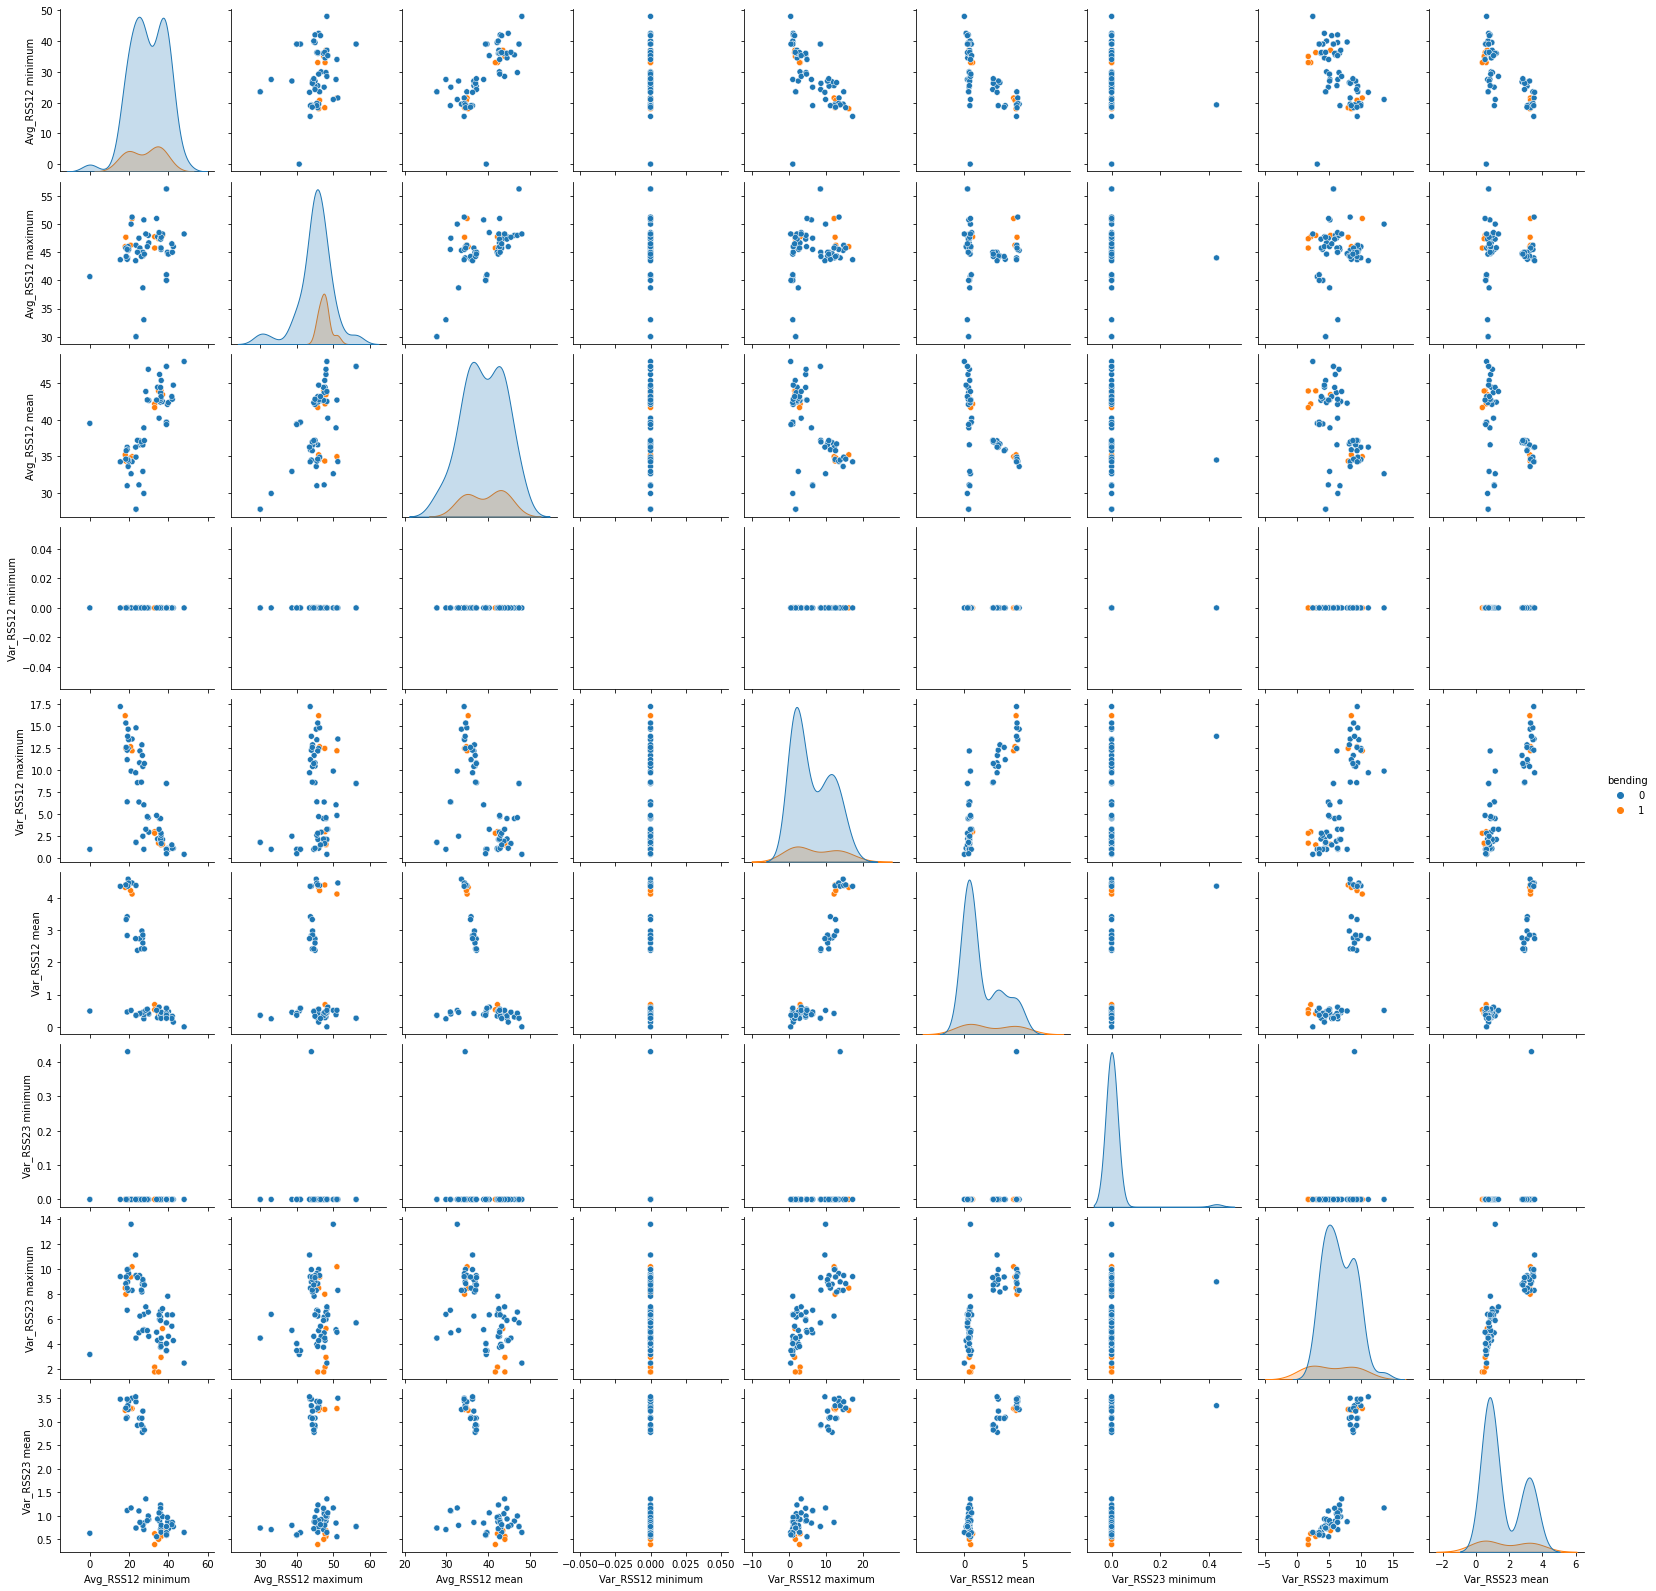

In [329]:
features = ["Avg_RSS12 minimum", "Avg_RSS12 maximum", "Avg_RSS12 mean", "Var_RSS12 minimum", "Var_RSS12 maximum", "Var_RSS12 mean", "Var_RSS23 minimum", "Var_RSS23 maximum", "Var_RSS23 mean"]
new_data_set = train_data_table[features]
new_data_set["bending"]=[1]*9+[0]*60
sns.pairplot(new_data_set, hue="bending")

## (d)ii.

In [330]:
break_data_list={}
name = ['Avg_RSS12_1', 'Avg_RSS12_2', 'Avg_RSS13_1', 'Avg_RSS13_2', 'Avg_RSS23_1', 'Avg_RSS23_2',
        'Var_RSS12_1', 'Var_RSS12_2', 'Var_RSS13_1', 'Var_RSS13_2', 'Var_RSS23_1', 'Var_RSS23_2']
new_table = []
new_table1 = []
for key, data in train_data_list.items():
    if key == 'sitting_dataset8.csv':
        Avg_RSS12_1 = data['Avg_RSS12'][0:239]
        Avg_RSS12_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Avg_RSS12_1))
        #new_table.append(list(Avg_RSS12_2))
        
        Avg_RSS13_1 = data['Avg_RSS12'][0:239]
        Avg_RSS13_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Avg_RSS13_1))
        #new_table.append(list(Avg_RSS13_2))
        
        Avg_RSS23_1 = data['Avg_RSS12'][0:239]
        Avg_RSS23_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Avg_RSS23_1))
        #new_table.append(list(Avg_RSS23_2))
        
        Var_RSS12_1 = data['Avg_RSS12'][0:239]
        Var_RSS12_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Var_RSS12_1))
        #new_table.append(list(Var_RSS12_2))
        
        Var_RSS13_1 = data['Avg_RSS12'][0:239]
        Var_RSS13_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Var_RSS13_1))
        #new_table.append(list(Var_RSS13_2))
        
        Var_RSS23_1 = data['Avg_RSS12'][0:239]
        Var_RSS23_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Var_RSS23_1))
        #new_table.append(list(Var_RSS23_2))
    else:
        Avg_RSS12_1 = data['Avg_RSS12'][0:240]
        Avg_RSS12_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Avg_RSS12_1))
        #new_table.append(list(Avg_RSS12_2))
        
        Avg_RSS13_1 = data['Avg_RSS12'][0:240]
        Avg_RSS13_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Avg_RSS13_1))
        #new_table.append(list(Avg_RSS13_2))
        
        Avg_RSS23_1 = data['Avg_RSS12'][0:240]
        Avg_RSS23_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Avg_RSS23_1))
        #new_table.append(list(Avg_RSS23_2))
        
        Var_RSS12_1 = data['Avg_RSS12'][0:240]
        Var_RSS12_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Var_RSS12_1))
        #new_table.append(list(Var_RSS12_2))
        
        Var_RSS13_1 = data['Avg_RSS12'][0:240]
        Var_RSS13_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Var_RSS13_1))
        #new_table.append(list(Var_RSS13_2))
        
        Var_RSS23_1 = data['Avg_RSS12'][0:240]
        Var_RSS23_2 = data['Avg_RSS12'][240:]
        #new_table.append(list(Var_RSS23_1))
        #new_table.append(list(Var_RSS23_2))
    
    #new_table1 = pd.DataFrame(new_table)
    #new_table1 = new_table1.T
    #new_table1.columns = ['Avg_RSS12_1', 'Avg_RSS12_2', 'Avg_RSS13_1', 'Avg_RSS13_2', 'Avg_RSS23_1', 'Avg_RSS23_2','Var_RSS12_1', 'Var_RSS12_2', 'Var_RSS13_1', 'Var_RSS13_2', 'Var_RSS23_1', 'Var_RSS23_2']
    #break_data_list[key] = new_table1
    break_data_list[key] = pd.DataFrame(
                                        {
                                         'Avg_RSS12_1': list(Avg_RSS12_1),
                                         'Var_RSS12_1': list(Var_RSS12_1),
                                         'Avg_RSS13_1': list(Avg_RSS13_1),
                                         'Var_RSS13_1': list(Var_RSS13_1),
                                         'Avg_RSS23_1': list(Avg_RSS23_1),
                                         'Var_RSS23_1': list(Var_RSS23_1), 
                                         'Avg_RSS12_2': list(Avg_RSS12_2),
                                         'Var_RSS12_2': list(Var_RSS12_2),
                                         'Avg_RSS13_2': list(Avg_RSS13_2),
                                         'Var_RSS13_2': list(Var_RSS13_2),
                                         'Avg_RSS23_2': list(Avg_RSS23_2),
                                         'Var_RSS23_2': list(Var_RSS23_2),  
                                        })

In [331]:
all_data = list(break_data_list.values())
#print(len(all_data))
data_table = []
for df in all_data:
    dataset= [" "]
    names = [" "]
    for column in df.columns[0:]:
        minimum = min(df[column])
        dataset.append(minimum)
        names.append(column + " minimum")
        
        maximum = max(df[column])
        dataset.append(maximum)
        names.append(column + " maximum")
        
        mean = stat.mean(df[column])
        dataset.append(mean)
        names.append(column + " mean")
        
        median = stat.median(df[column])
        dataset.append(median)
        names.append(column + " median")
        
        standard_deviation = df[column].std()
        dataset.append(standard_deviation)
        names.append(column + " standard_deviation")
        
        first_quartile = df[column].quantile(0.25)
        dataset.append(first_quartile)
        names.append(column + " first_quartile")
        
        third_quartile = df[column].quantile(0.75)
        dataset.append(third_quartile)
        names.append(column + " third_quartile")
 
    data_table.append(dataset)
    
new_data_table = pd.DataFrame(data_table, columns = names)
new_data_table = new_data_table.iloc[: , 1:]
new_data_table

,Avg_RSS12_1 minimum,Avg_RSS12_1 maximum,Avg_RSS12_1 mean,Avg_RSS12_1 median,Avg_RSS12_1 standard_deviation,Avg_RSS12_1 first_quartile,Avg_RSS12_1 third_quartile,Var_RSS12_1 minimum,Var_RSS12_1 maximum,Var_RSS12_1 mean,...,Avg_RSS23_2 standard_deviation,Avg_RSS23_2 first_quartile,Avg_RSS23_2 third_quartile,Var_RSS23_2 minimum,Var_RSS23_2 maximum,Var_RSS23_2 mean,Var_RSS23_2 median,Var_RSS23_2 standard_deviation,Var_RSS23_2 first_quartile,Var_RSS23_2 third_quartile
0,36.67,45.00,43.486208,43.71,1.281976,42.3300,44.50,36.67,45.00,43.486208,...,1.771251,44.25,44.7500,36.25,48.00,44.452042,44.500,1.771251,44.25,44.7500
1,39.00,48.00,44.117042,45.00,1.359836,43.5000,45.00,39.00,48.00,44.117042,...,1.058792,42.50,43.0000,37.00,46.50,42.792875,42.670,1.058792,42.50,43.0000
2,33.75,47.75,43.278875,45.00,3.473355,42.0000,45.25,33.75,47.75,43.278875,...,3.537481,37.75,44.5000,33.00,46.00,41.080750,42.000,3.537481,37.75,44.5000
3,33.00,45.75,41.621208,42.33,3.118644,39.6525,44.25,33.00,45.75,41.621208,...,0.595920,41.50,42.0000,39.25,43.67,41.734917,41.500,0.595920,41.50,42.0000
4,36.50,46.50,44.057167,44.50,1.556971,43.2500,45.00,36.50,46.50,44.057167,...,1.557168,43.00,45.0000,35.00,47.40,43.851833,43.500,1.557168,43.00,45.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,20.00,44.25,35.692167,35.50,4.643595,33.0000,39.25,20.00,44.25,35.692167,...,4.594741,33.25,39.3725,18.50,44.00,35.812542,36.000,4.594741,33.25,39.3725
65,24.25,45.00,36.954208,36.00,3.772836,34.2500,40.25,24.25,45.00,36.954208,...,3.372104,35.00,40.2500,29.00,44.67,37.399875,36.500,3.372104,35.00,40.2500
66,27.00,42.67,36.342750,36.75,3.648495,33.6700,39.00,27.00,42.67,36.342750,...,3.993202,33.31,39.2700,23.33,43.50,36.145417,36.500,3.993202,33.31,39.2700
67,26.25,43.40,36.865417,36.25,3.462793,34.3100,40.00,26.25,43.40,36.865417,...,3.411449,34.50,40.2500,29.25,44.25,37.049500,36.415,3.411449,34.50,40.2500


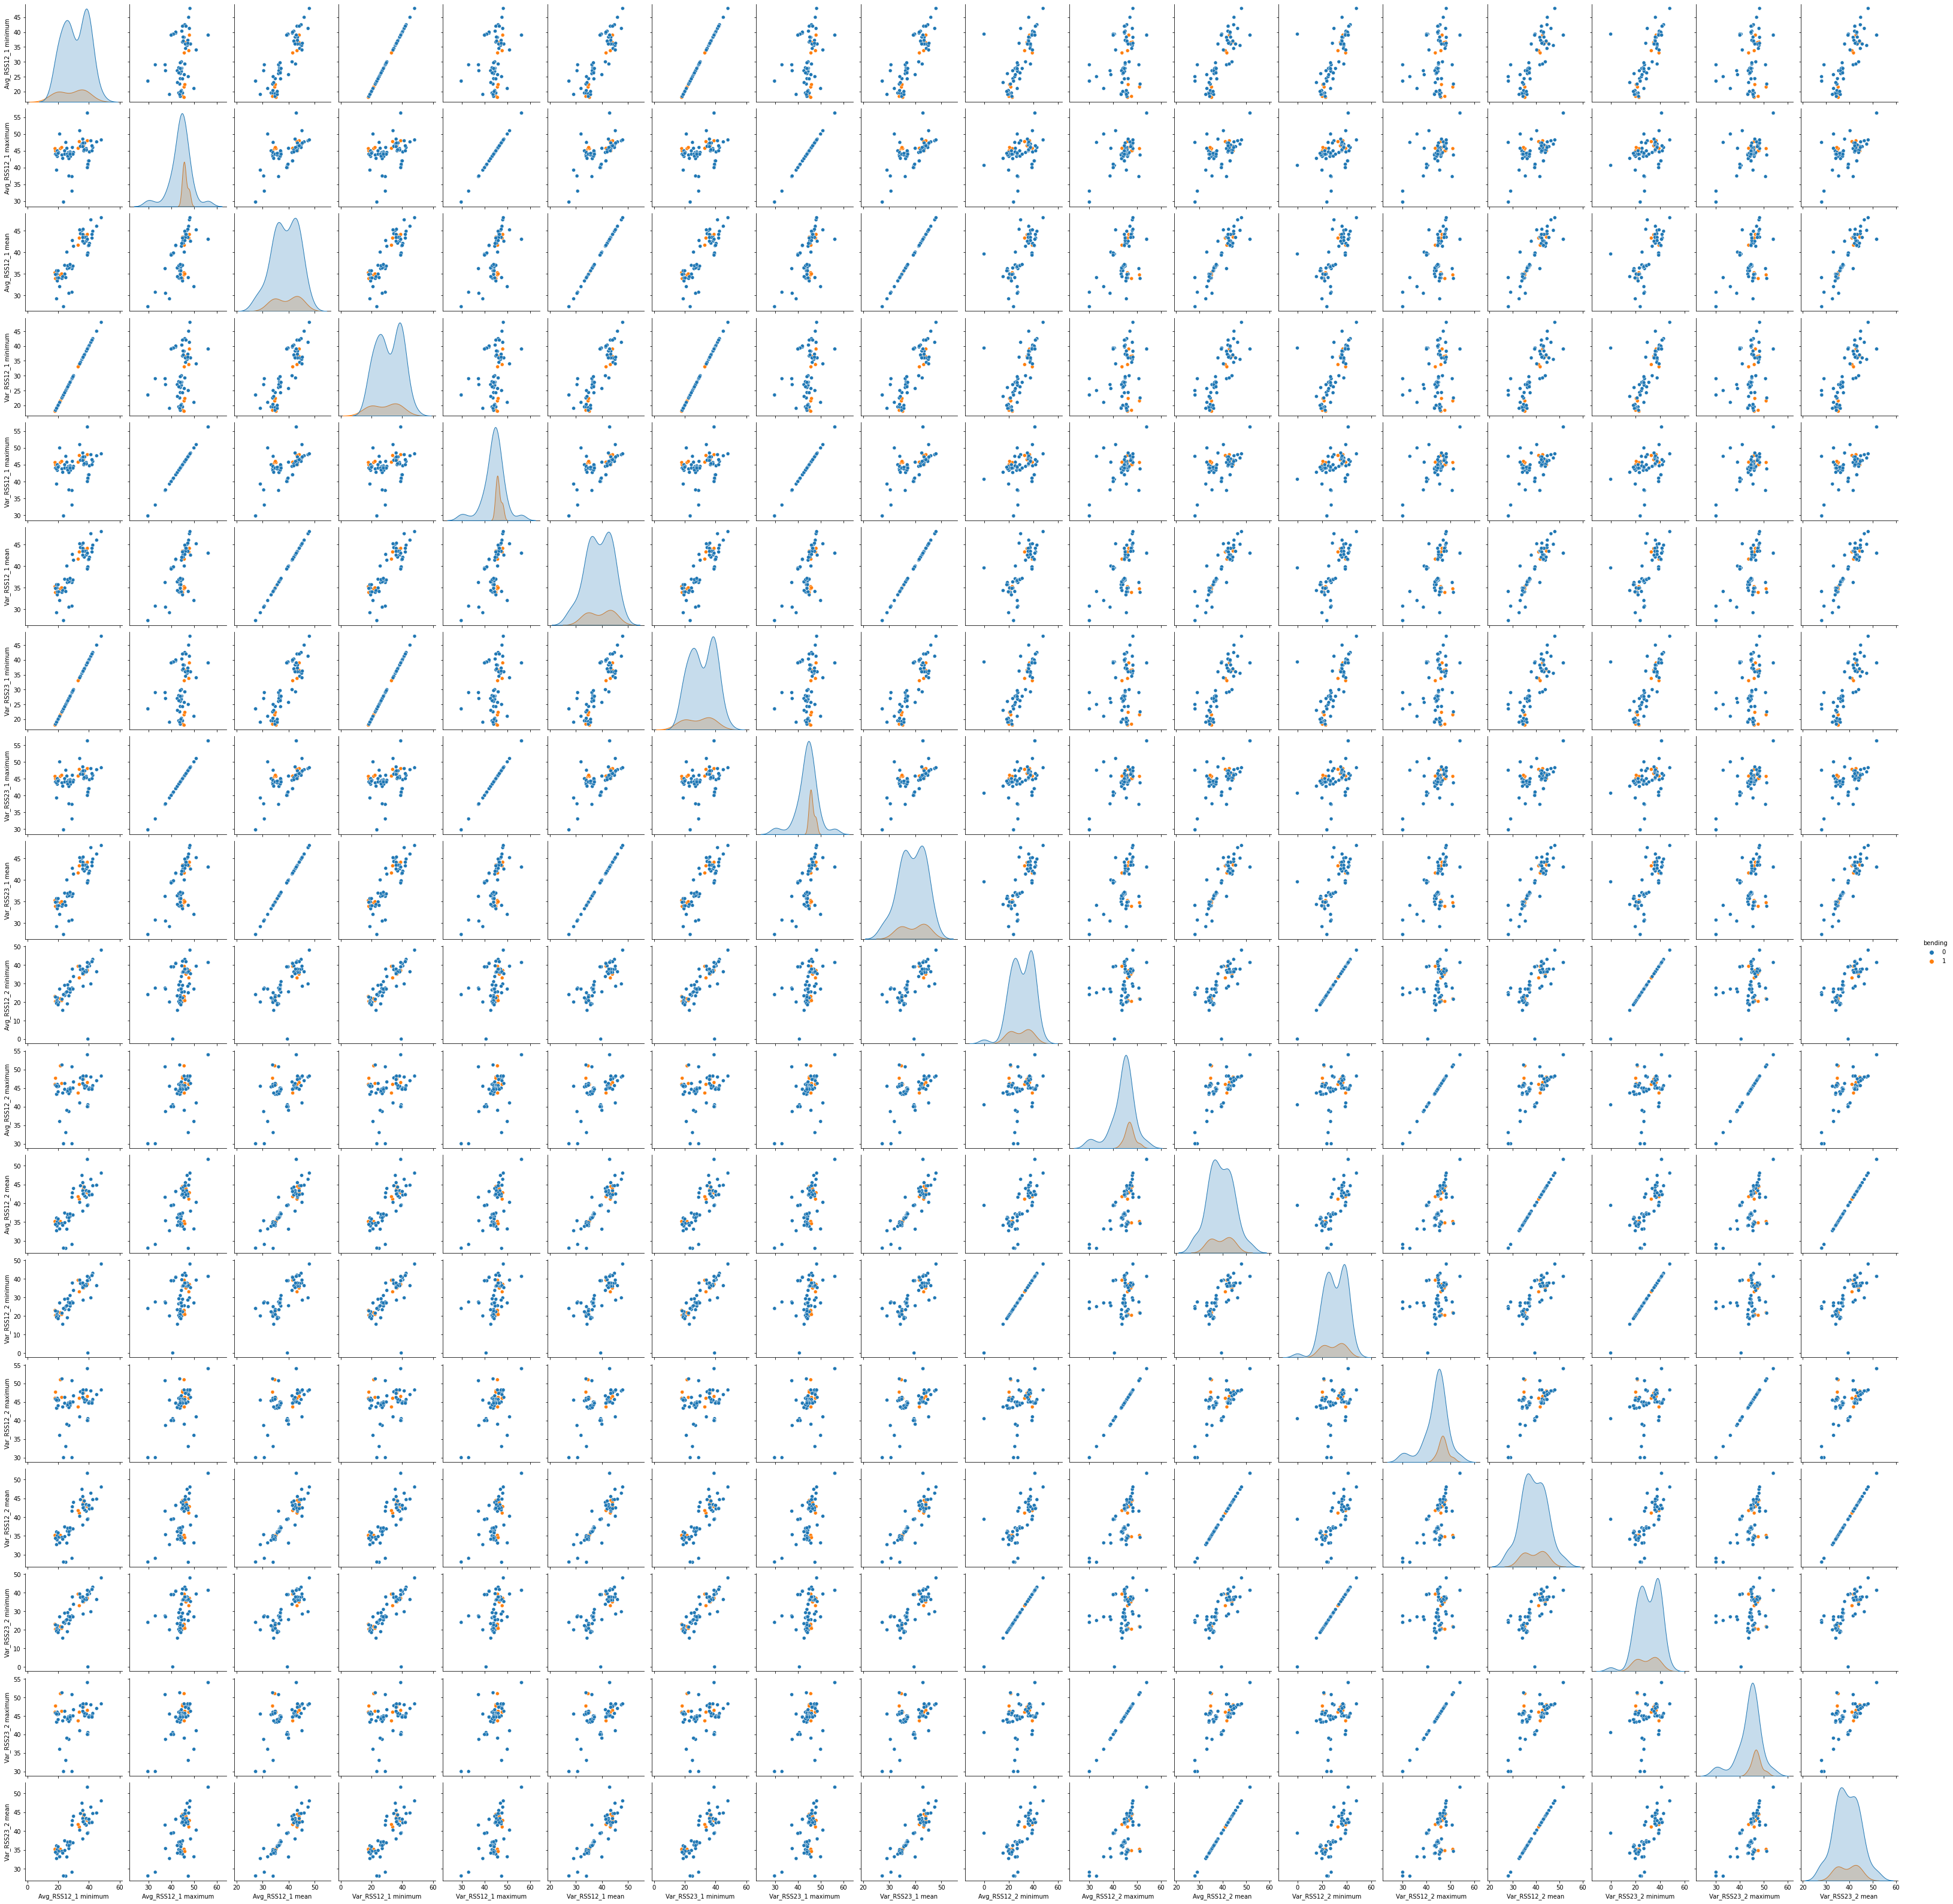

In [332]:
features = ["Avg_RSS12_1 minimum", "Avg_RSS12_1 maximum", "Avg_RSS12_1 mean", "Var_RSS12_1 minimum", "Var_RSS12_1 maximum", "Var_RSS12_1 mean", "Var_RSS23_1 minimum", "Var_RSS23_1 maximum", "Var_RSS23_1 mean",
            "Avg_RSS12_2 minimum", "Avg_RSS12_2 maximum", "Avg_RSS12_2 mean", "Var_RSS12_2 minimum", "Var_RSS12_2 maximum", "Var_RSS12_2 mean", "Var_RSS23_2 minimum", "Var_RSS23_2 maximum", "Var_RSS23_2 mean"]
new_data_set = new_data_table[features]
new_data_set["bending"]=[1]*9+[0]*60
sns.pairplot(new_data_set, hue="bending")

Each feature has a direct proportional relationship.

## (d)iii

In [333]:
features = ["minimum", "maximum", "mean"]
def create_xy(l, data_list):
    size = 480//l
    for key in data_list:
        df = data_list[key]
        if 'Time' in df.columns: 
            df.pop('Time')
        for trunk in range(l):
            start_index = size * trunk
            end_index = size * (trunk+1)
            cur_df = df.iloc[start_index:end_index]
            tmp_d = dict()
            tmp_d["mean"], tmp_d["maximum"], tmp_d["minimum"] = cur_df.mean(axis=0), cur_df.max(axis=0), cur_df.min(axis=0)
            for feature in features:
                for column in cur_df:
                    d[f"{column} {feature} {trunk}"].append(tmp_d[feature][column])
        if "bending" in key:
            prediction.append(1)
        else:
            prediction.append(0)

    X = pd.DataFrame(d)
    y = pd.DataFrame(prediction)
    return X, y

l_score = {}
p_value = []
p_dic = {}
for l in range(1, 21):
    d = defaultdict(list)
    prediction = []
    p_list = []
    train_X, train_y = create_xy(l, train_data_list)
    #print(train_X)
    model = LogisticRegression(max_iter=1000)
    cv = StratifiedKFold(5)
    rfe = RFECV(estimator = model, step=1, cv=cv, scoring='accuracy')
    rfe.fit(train_X, train_y)
    array = rfe.get_support()
    l_score[l] = np.mean(rfe.grid_scores_)
    p_value.append(rfe.n_features_)
    for i in range(len(array)):
        if array[i]:
            p_list.append(train_X.columns.values[i])
    p_dic[l] = p_list        
    print(f" l is {l}, the number of features is p {rfe.n_features_}, accuracy is {np.mean(rfe.grid_scores_)}")
    
#l_score
#p_list

 l is 1, the number of features is p 3, accuracy is 0.9435897435897437
 l is 2, the number of features is p 2, accuracy is 0.9344932844932845
 l is 3, the number of features is p 4, accuracy is 0.9416971916971917
 l is 4, the number of features is p 1, accuracy is 0.9457722832722832
 l is 5, the number of features is p 1, accuracy is 0.9293162393162393
 l is 6, the number of features is p 1, accuracy is 0.9358262108262109
 l is 7, the number of features is p 21, accuracy is 0.9469038897610326
 l is 8, the number of features is p 16, accuracy is 0.9400717338217339
 l is 9, the number of features is p 5, accuracy is 0.9301383801383801
 l is 10, the number of features is p 1, accuracy is 0.9418192918192919
 l is 11, the number of features is p 41, accuracy is 0.942923742923743
 l is 12, the number of features is p 3, accuracy is 0.9318783068783068
 l is 13, the number of features is p 1, accuracy is 0.9324175824175823
 l is 14, the number of features is p 5, accuracy is 0.9323696145124716

In [336]:
best_score = -1
l = 0
for i in range(1,21):
    if l_score[i] > best_score:
        best_score = l_score[i]
        l = i
        p = p_value[l-1]
        
p_dic[l]
print(f"the best (l,p) is {l,p}, and the best score is {best_score}")
#p_value

the best (l,p) is (7, 21), and the best score is 0.9469038897610326


stratified cross validation is the right way, and k fold cross validation is the wrong way. Since we need to make sure that the ratio of bending data to non-bending data is the same as before, stratified cross validation is the right way.

## (d)iv.

In [337]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm

d = defaultdict(list)
prediction = []
x_train, y_train = create_xy(l, train_data_list)
x_train = x_train[p_dic[l]]

#Lr = LogisticRegression()
#Lr.fit(x_train, y_train)
#pred = Lr.predict(x_train)
model = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(5)
rfe = RFECV(estimator = model, step=1, cv=cv, scoring='accuracy')
rfe.fit(x_train, train_y)
pred = rfe.predict(x_train)

print("confusion_matrix is: \n", confusion_matrix(y_train, pred))

confusion_matrix is: 
 [[60  0]
 [ 0  9]]


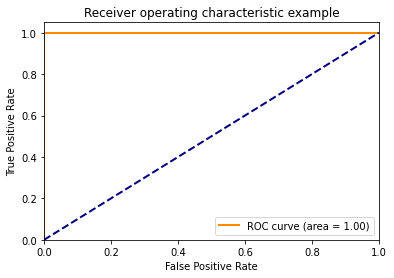

In [338]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_train, pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [339]:
logit = sm.Logit(y_train, x_train)
result = logit.fit_regularized()
print(result.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 8.73581562607157e-11
            Iterations: 41
            Function evaluations: 49
            Gradient evaluations: 41
                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:                   69
Model:                          Logit   Df Residuals:                       48
Method:                           MLE   Df Model:                           20
Date:                Fri, 08 Oct 2021   Pseudo R-squ.:                   1.000
Time:                        20:14:32   Log-Likelihood:            -6.0277e-09
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 7.012e-05
                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------

## (d)v.

In [340]:
d = defaultdict(list)
prediction = []
x_train, y_train = create_xy(l, test_data_list)
x_train = x_train[p_dic[l]]
model = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(5)
rfe = RFECV(estimator = model, step=1, cv=cv, scoring='accuracy')
rfe.fit(x_train, y_train)
accury = np.mean(rfe.grid_scores_)
accury

0.9452380952380952

Compare the accuracy on the train set, the accuracy on test set is a litte smaller than accuracy on the train set.

## (d)vi.

Yes, according to the summary table in (d)iv, there some p value of features are nan, which mean it is well-separated to cause instability in calculating logistic regression parameters. 

## (d)vii.

In [341]:
#from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

#sm = SMOTE(random_state=42)
under = RandomUnderSampler(sampling_strategy=(1/3))
d = defaultdict(list)
prediction = []
x_train, y_train = create_xy(l, train_data_list)
x_train, y_train = under.fit_resample(x_train, y_train)

model = LogisticRegression(max_iter=1000)
cv = StratifiedKFold(5)
rfe = RFECV(estimator = model, step=1, cv=cv, scoring='accuracy')
rfe.fit(x_train, y_train)
pred = rfe.predict(x_train)

print("confusion_matrix is: \n", confusion_matrix(y_train, pred))

confusion_matrix is: 
 [[27  0]
 [ 0  9]]


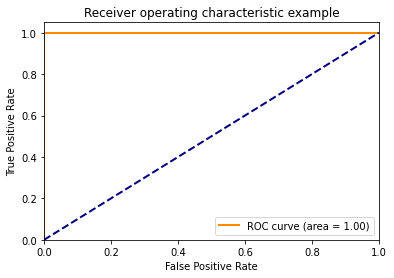

In [342]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_train, pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## (e)i.

In [364]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

l_score1={}
dic ={}
for l in range(1,21):
    d = defaultdict(list)
    prediction = []
    array = []
    train_x1, train_y1 = create_xy(l, train_data_list)
    scaler = StandardScaler()
    train_x1 = scaler.fit_transform(train_x1)
    
    test_x1, test_y1 = create_xy(l, test_data_list)
    test_x1 = scaler.transform(test_x1)
    
    clf1 = LogisticRegressionCV(Cs=np.logspace(0.0001,10000), cv=5, penalty='l1', solver='liblinear')
    clf1.fit(train_x1, train_y1) 
    dic[l] = clf1.C_
    l_score1[l] = clf1.score(test_x1, test_y1)
    
best_score = -1
l = 0
for i in range(1,21):
    if l_score[i] > best_score:
        best_score = l_score[i]
        l = i
C = dic[l][0]
print(f"the best (l,C) is {l, C}, and the best score is {best_score}")

the best (l,C) is (7, 1.0002302850208247), and the best score is 0.9469038897610326


## (e)ii.

This one is better than L1-penalized with variable selection using p-value, and this one is easier to implement because since we can answer by using Cs and C_ attributes in regression.

## (f)i.

In [423]:
from sklearn.multiclass import OneVsRestClassifier
def create_xy1(l, data_list):
    size = 480//l
    for key in data_list:
        df = data_list[key]
        if 'Time' in df.columns: 
            df.pop('Time')
        for trunk in range(l):
            start_index = size * trunk
            end_index = size * (trunk+1)
            cur_df = df.iloc[start_index:end_index]
            tmp_d = dict()
            tmp_d["mean"], tmp_d["maximum"], tmp_d["minimum"] = cur_df.mean(axis=0), cur_df.max(axis=0), cur_df.min(axis=0)
            for feature in features:
                for column in cur_df:
                    d[f"{column} {feature} {trunk}"].append(tmp_d[feature][column])
        
        if "bending" in key:
            prediction.append(1)
        elif "cycling" in key:
            prediction.append(2)
        elif "lying" in key:
            prediction.append(3)
        elif "sitting" in key:
            prediction.append(4)
        elif "standing" in key:
            prediction.append(5)
        elif "walking" in key:
            prediction.append(6)

    X = pd.DataFrame(d)
    y = pd.DataFrame(prediction)
    return X, y

In [424]:
l_score1={}
l_test_error={}

for l in range(1,21):
    d = defaultdict(list)
    prediction = []
    train_x2, train_y2 = create_xy1(l, train_data_list)
    scaler = StandardScaler()
    train_x2 = scaler.fit_transform(train_x2)
    
    test_x2, test_y2 = create_xy1(l, test_data_list)
    test_x2 = scaler.transform(test_x2)
    
    clf = LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear')
    clf.fit(train_x2, train_y2)
    l_score1[l] = clf.score(test_x2, test_y2)
    l_test_error[l] = 1 - clf.score(test_x2, test_y2)

best_score = -1
l = 0
for i in range(1,21):
    if l_score1[i] > best_score:
        best_score = l_score[i]
        l = i
        
print(f'best l is:', l)
l_test_error

best l is: 19


{1: 0.09090909090909094,
 2: 0.06818181818181823,
 3: 0.05681818181818177,
 4: 0.05681818181818177,
 5: 0.045454545454545414,
 6: 0.06818181818181823,
 7: 0.045454545454545414,
 8: 0.022727272727272707,
 9: 0.045454545454545414,
 10: 0.03409090909090906,
 11: 0.06818181818181823,
 12: 0.022727272727272707,
 13: 0.045454545454545414,
 14: 0.05681818181818177,
 15: 0.05681818181818177,
 16: 0.03409090909090906,
 17: 0.045454545454545414,
 18: 0.05681818181818177,
 19: 0.045454545454545414,
 20: 0.05681818181818177}

In [425]:
pred = clf.predict(test_x2)
print("confusion_matrix is: \n", confusion_matrix(test_y2, pred))

confusion_matrix is: 
 [[12  0  0  1  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0 14  0  1  0]
 [ 0  0  0 14  1  0]
 [ 0  0  0  2 13  0]
 [ 0  0  0  0  0 15]]


TypeError: float() argument must be a string or a number, not 'list'

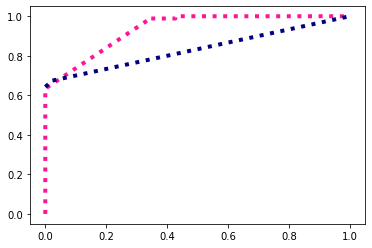

In [428]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
l=19
d = defaultdict(list)
prediction = []
train_x2, train_y2 = create_xy1(l, train_data_list)
scaler = StandardScaler()
train_x2 = scaler.fit_transform(train_x2)
    
test_x2, test_y2 = create_xy1(l, test_data_list)
test_x2 = scaler.transform(test_x2)

new_test= label_binarize(test_y2, classes=[1,2,3,4,5,6])
new_train=label_binarize(train_y2, classes=[1,2,3,4,5,6])
n_classes = new_train.shape[1]
#n_classes = new_test.shape[1]

model = OneVsRestClassifier(LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear'))
#model.fit(train_x2, new_train)
#pred=model.predict(test_x2)
y_score= model.fit(train_x2, train_y2).decision_function(test_x2)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], threshold = roc_curve(new_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(new_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw=[0,1,2,3,4,5]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## (f)ii.

In [429]:
from sklearn.naive_bayes import MultinomialNB
l_score={}
for l in range(1,21):
    d = defaultdict(list)
    prediction = []
    train_x3, train_y3 = create_xy1(l, train_data_list)
    test_x3, test_y3 = create_xy1(l, test_data_list)
    
    clf3 = MultinomialNB()
    clf3.fit(train_x3, train_y3)
    l_score[l] = clf3.score(test_x3, test_y3)
    l_test_error[l] = 1 - clf3.score(test_x3, test_y3)

best_score = -1
l = 0
for i in range(1,21):
    if l_score1[i] > best_score:
        best_score = l_score[i]
        l = i

print(f'best l is:', l)  
l_test_error

best l is: 19


{1: 0.19318181818181823,
 2: 0.17045454545454541,
 3: 0.13636363636363635,
 4: 0.13636363636363635,
 5: 0.125,
 6: 0.11363636363636365,
 7: 0.10227272727272729,
 8: 0.11363636363636365,
 9: 0.10227272727272729,
 10: 0.11363636363636365,
 11: 0.10227272727272729,
 12: 0.07954545454545459,
 13: 0.09090909090909094,
 14: 0.09090909090909094,
 15: 0.06818181818181823,
 16: 0.07954545454545459,
 17: 0.06818181818181823,
 18: 0.06818181818181823,
 19: 0.045454545454545414,
 20: 0.06818181818181823}

In [435]:
pre = clf3.predict(test_x3)  
print("confusion_matrix is: \n", confusion_matrix(test_y3, pred))

confusion_matrix is: 
 [[12  0  0  1  0  0]
 [ 0 15  0  0  0  0]
 [ 0  0 14  0  1  0]
 [ 0  0  0 14  1  0]
 [ 0  0  0  2 13  0]
 [ 0  0  0  0  0 15]]


TypeError: float() argument must be a string or a number, not 'list'

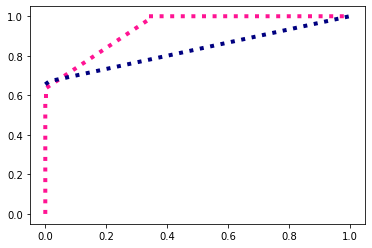

In [436]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

new_test= label_binarize(test_y3, classes=[1,2,3,4,5,6])
new_train=label_binarize(train_y3, classes=[1,2,3,4,5,6])
n_classes = new_train.shape[1]

model = OneVsRestClassifier(LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear'))
model.fit(train_x3, new_train)
pred=model.predict(test_x3)
y_score= model.fit(train_x3, train_y3).decision_function(test_x3)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], threshold = roc_curve(new_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(new_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw=[0,1,2,3,4,5]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [437]:
from sklearn.naive_bayes import GaussianNB
l_score={}
l_test_error ={}
for l in range(1,21):
    d = defaultdict(list)
    prediction = []
    train_x, train_y = create_xy1(l, train_data_list)
    scaler = StandardScaler()
    train_x = scaler.fit_transform(train_x)
    
    test_x, test_y = create_xy1(l, test_data_list)
    test_x = scaler.fit_transform(test_x)
    
    clf = GaussianNB()
    clf.fit(train_x, train_y)
    l_score[l] = clf.score(test_x, test_y)
    l_test_error[l] = 1 - clf.score(test_x, test_y)
    
best_score = -1
l = 0
for i in range(1,21):
    if l_score1[i] > best_score:
        best_score = l_score[i]
        l = i
        
print(f'best l is:', l)    
l_test_error

best l is: 20


{1: 0.8295454545454546,
 2: 0.8295454545454546,
 3: 0.8295454545454546,
 4: 0.8295454545454546,
 5: 0.8295454545454546,
 6: 0.8295454545454546,
 7: 0.8295454545454546,
 8: 0.6590909090909092,
 9: 0.6590909090909092,
 10: 0.8295454545454546,
 11: 0.6590909090909092,
 12: 0.6590909090909092,
 13: 0.6590909090909092,
 14: 0.6590909090909092,
 15: 0.6590909090909092,
 16: 0.6590909090909092,
 17: 0.6590909090909092,
 18: 0.6590909090909092,
 19: 0.6590909090909092,
 20: 0.6590909090909092}

In [438]:
pred = clf.predict(train_x)
print("confusion_matrix is: \n", confusion_matrix(train_y, pred))

confusion_matrix is: 
 [[ 9  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 1  0  0 10  1  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


TypeError: float() argument must be a string or a number, not 'list'

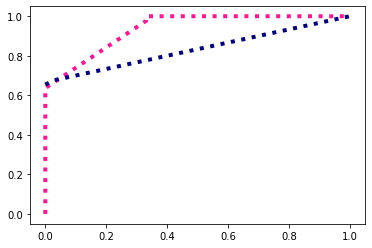

In [439]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

new_test= label_binarize(test_y, classes=[1,2,3,4,5,6])
new_train=label_binarize(train_y, classes=[1,2,3,4,5,6])
n_classes = new_train.shape[1]

model = OneVsRestClassifier(LogisticRegressionCV(cv=5, penalty='l1', solver='liblinear'))
model.fit(train_x, new_train)
pred=model.predict(test_x)
y_score= model.fit(train_x, train_y).decision_function(test_x)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], threshold = roc_curve(new_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr["micro"], tpr["micro"], _ = roc_curve(new_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw=[0,1,2,3,4,5]
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

## (f)iii.

I think multinomial naive bayes classifier is better than gaussian naive bayes classifier because every test error  in loop for multinomial naive bayes classifier is smaller than gaussian naive bayes classifier

## 2.ISLR 3.7.4

a) we expect linear regression to be lower than cubic regression. The relationship between X and Y is linear, so RSS for linear regression will be lower than cubic regression. 

b)I believe that RSS for linear regression will smaller than RSS for cubic regression. The data of test RSS for linear regression are all truth data, since cubic regression one dimention higher, so linear regression will fit btter than it. In this case, RSS for linear regression is better than cubic regression.

c) We expect cubic regression to be lower than linear regression. Since the true relationship between X and Y is not linear, and cubic regression is more flexiblity than linear regression, so RSS for cubic regression will be smaller than RSS for linear regression.

d) There is not enough information to tell. Since the question mention that "we don’t know how far it is from linear", if the relationship between X and Y is more near to linear regression, the RSS for linear regression will be smaller than RSS for cubic regression. However, if if the relationship between X and Y is more near to cubic regression, the RSS for cubic regression will be smaller than RSS for linear regression. In this case, there is not enough information to tell.

## 3.ISLR 4.8.3

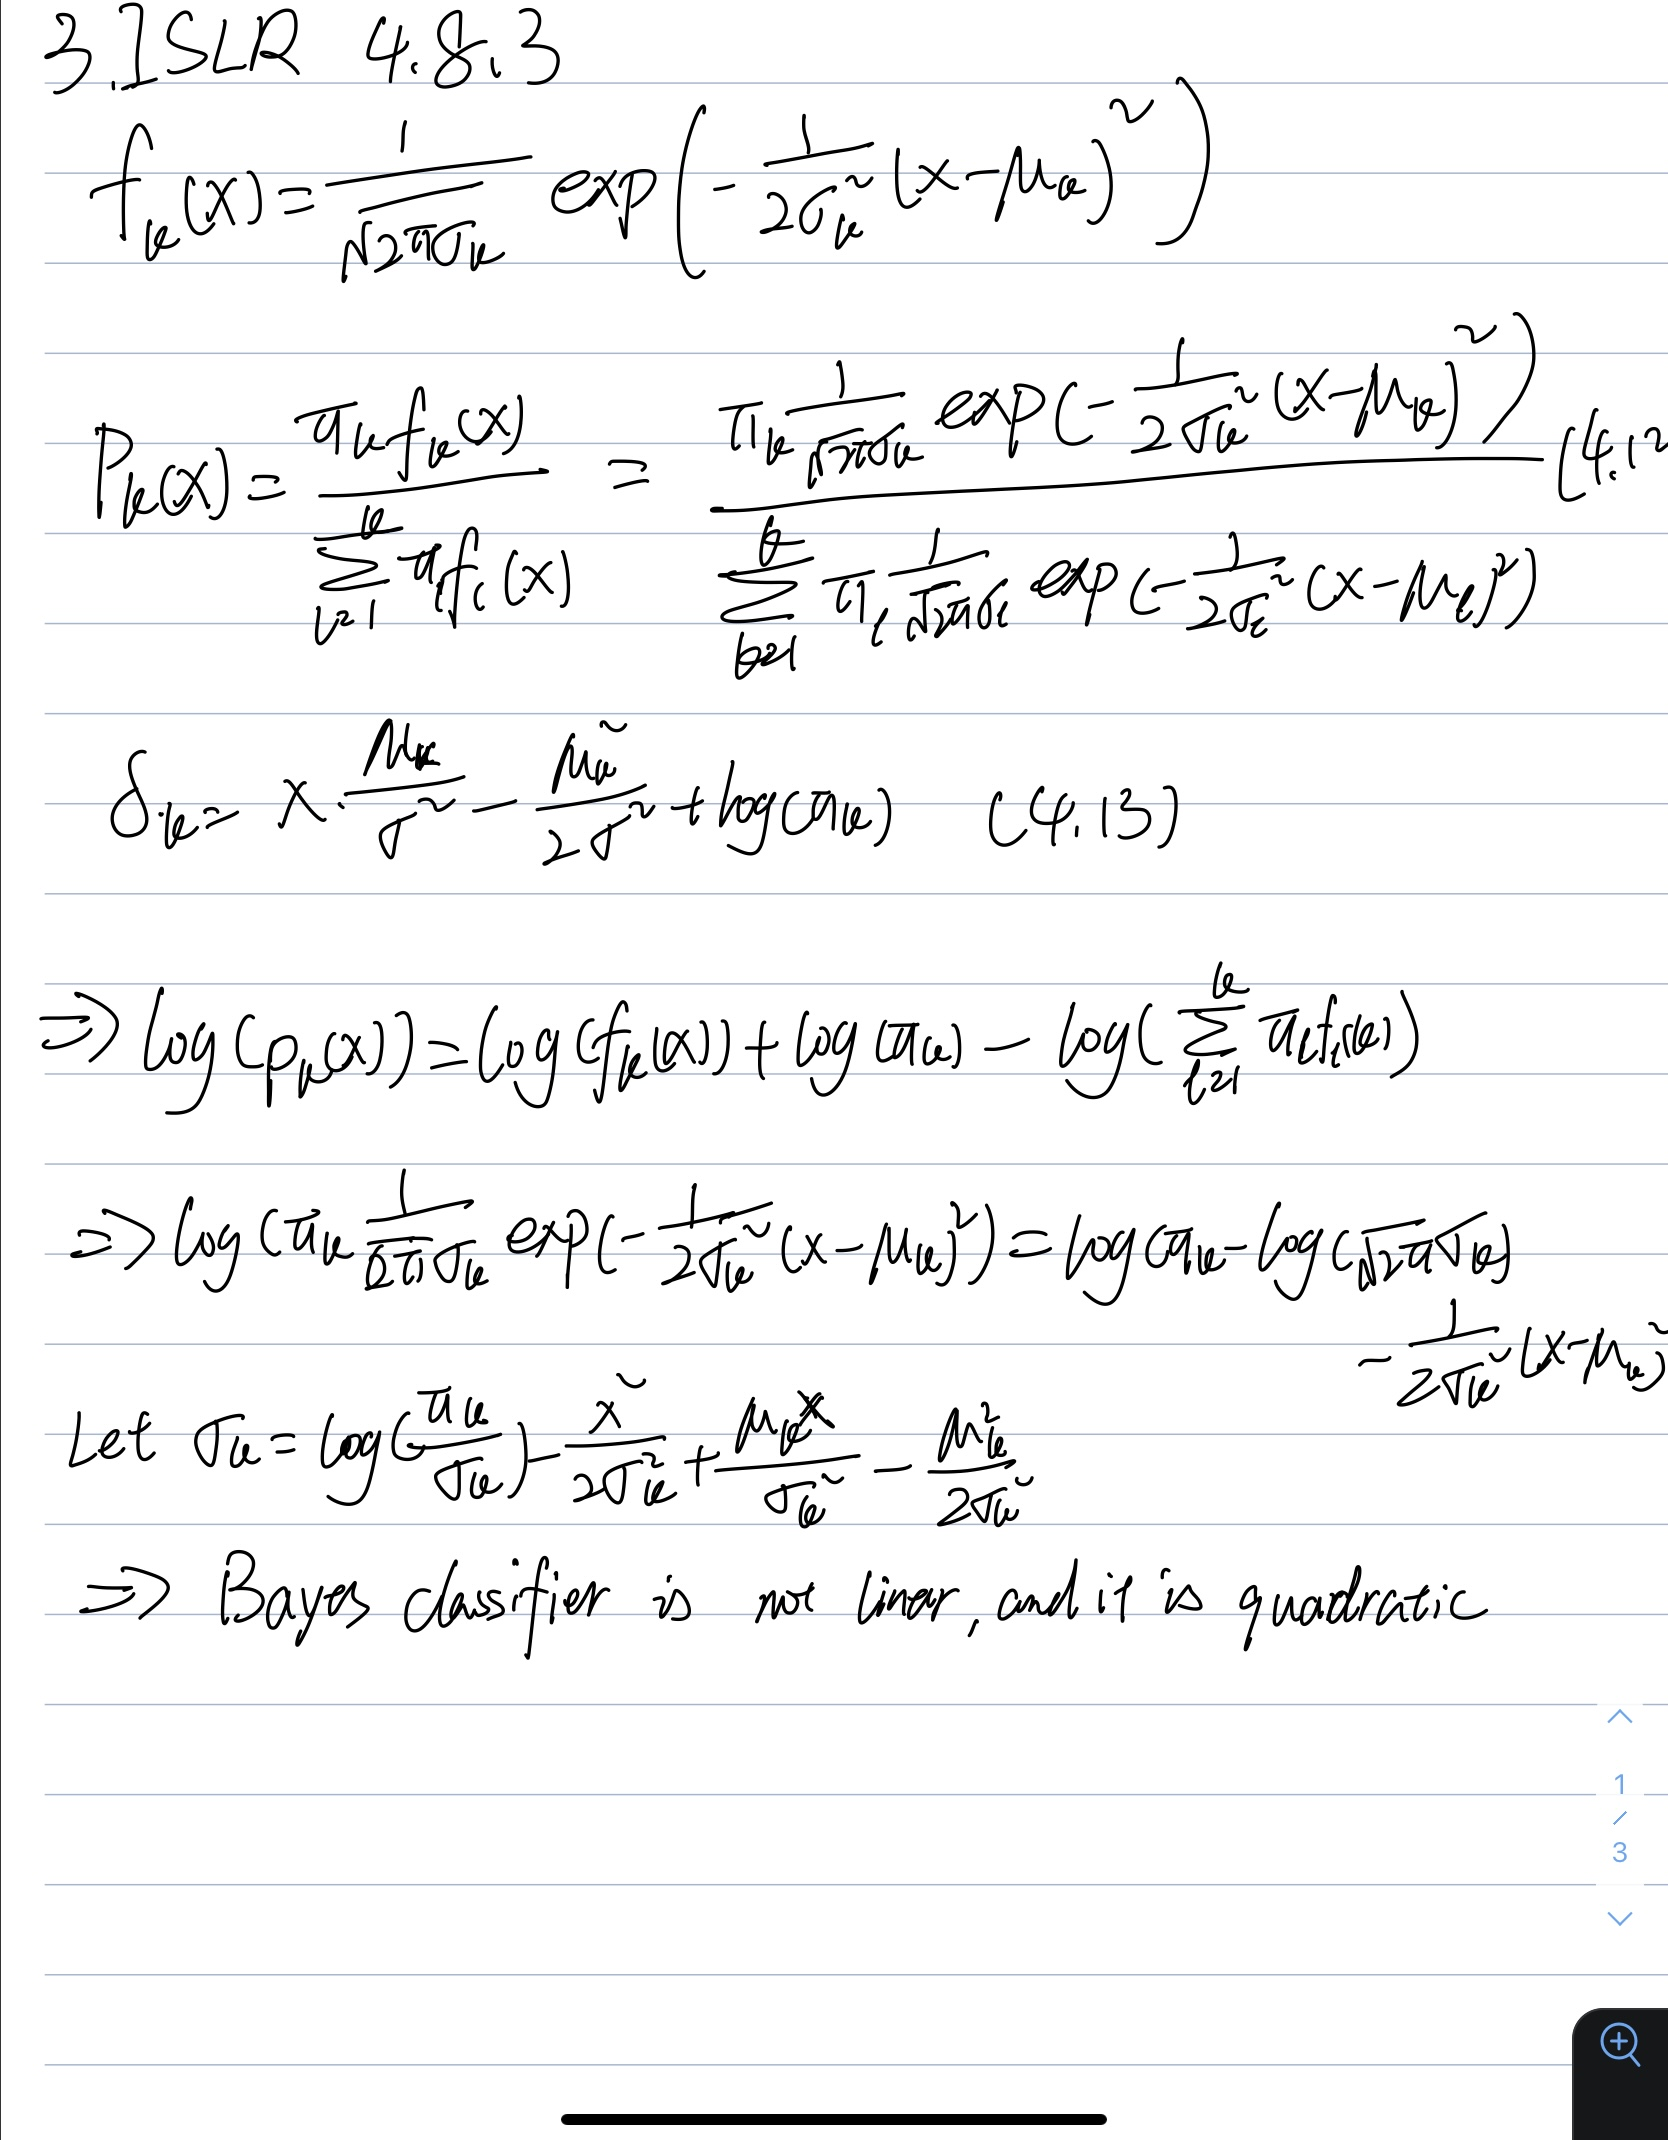

## 4.ISLR 4.8.7

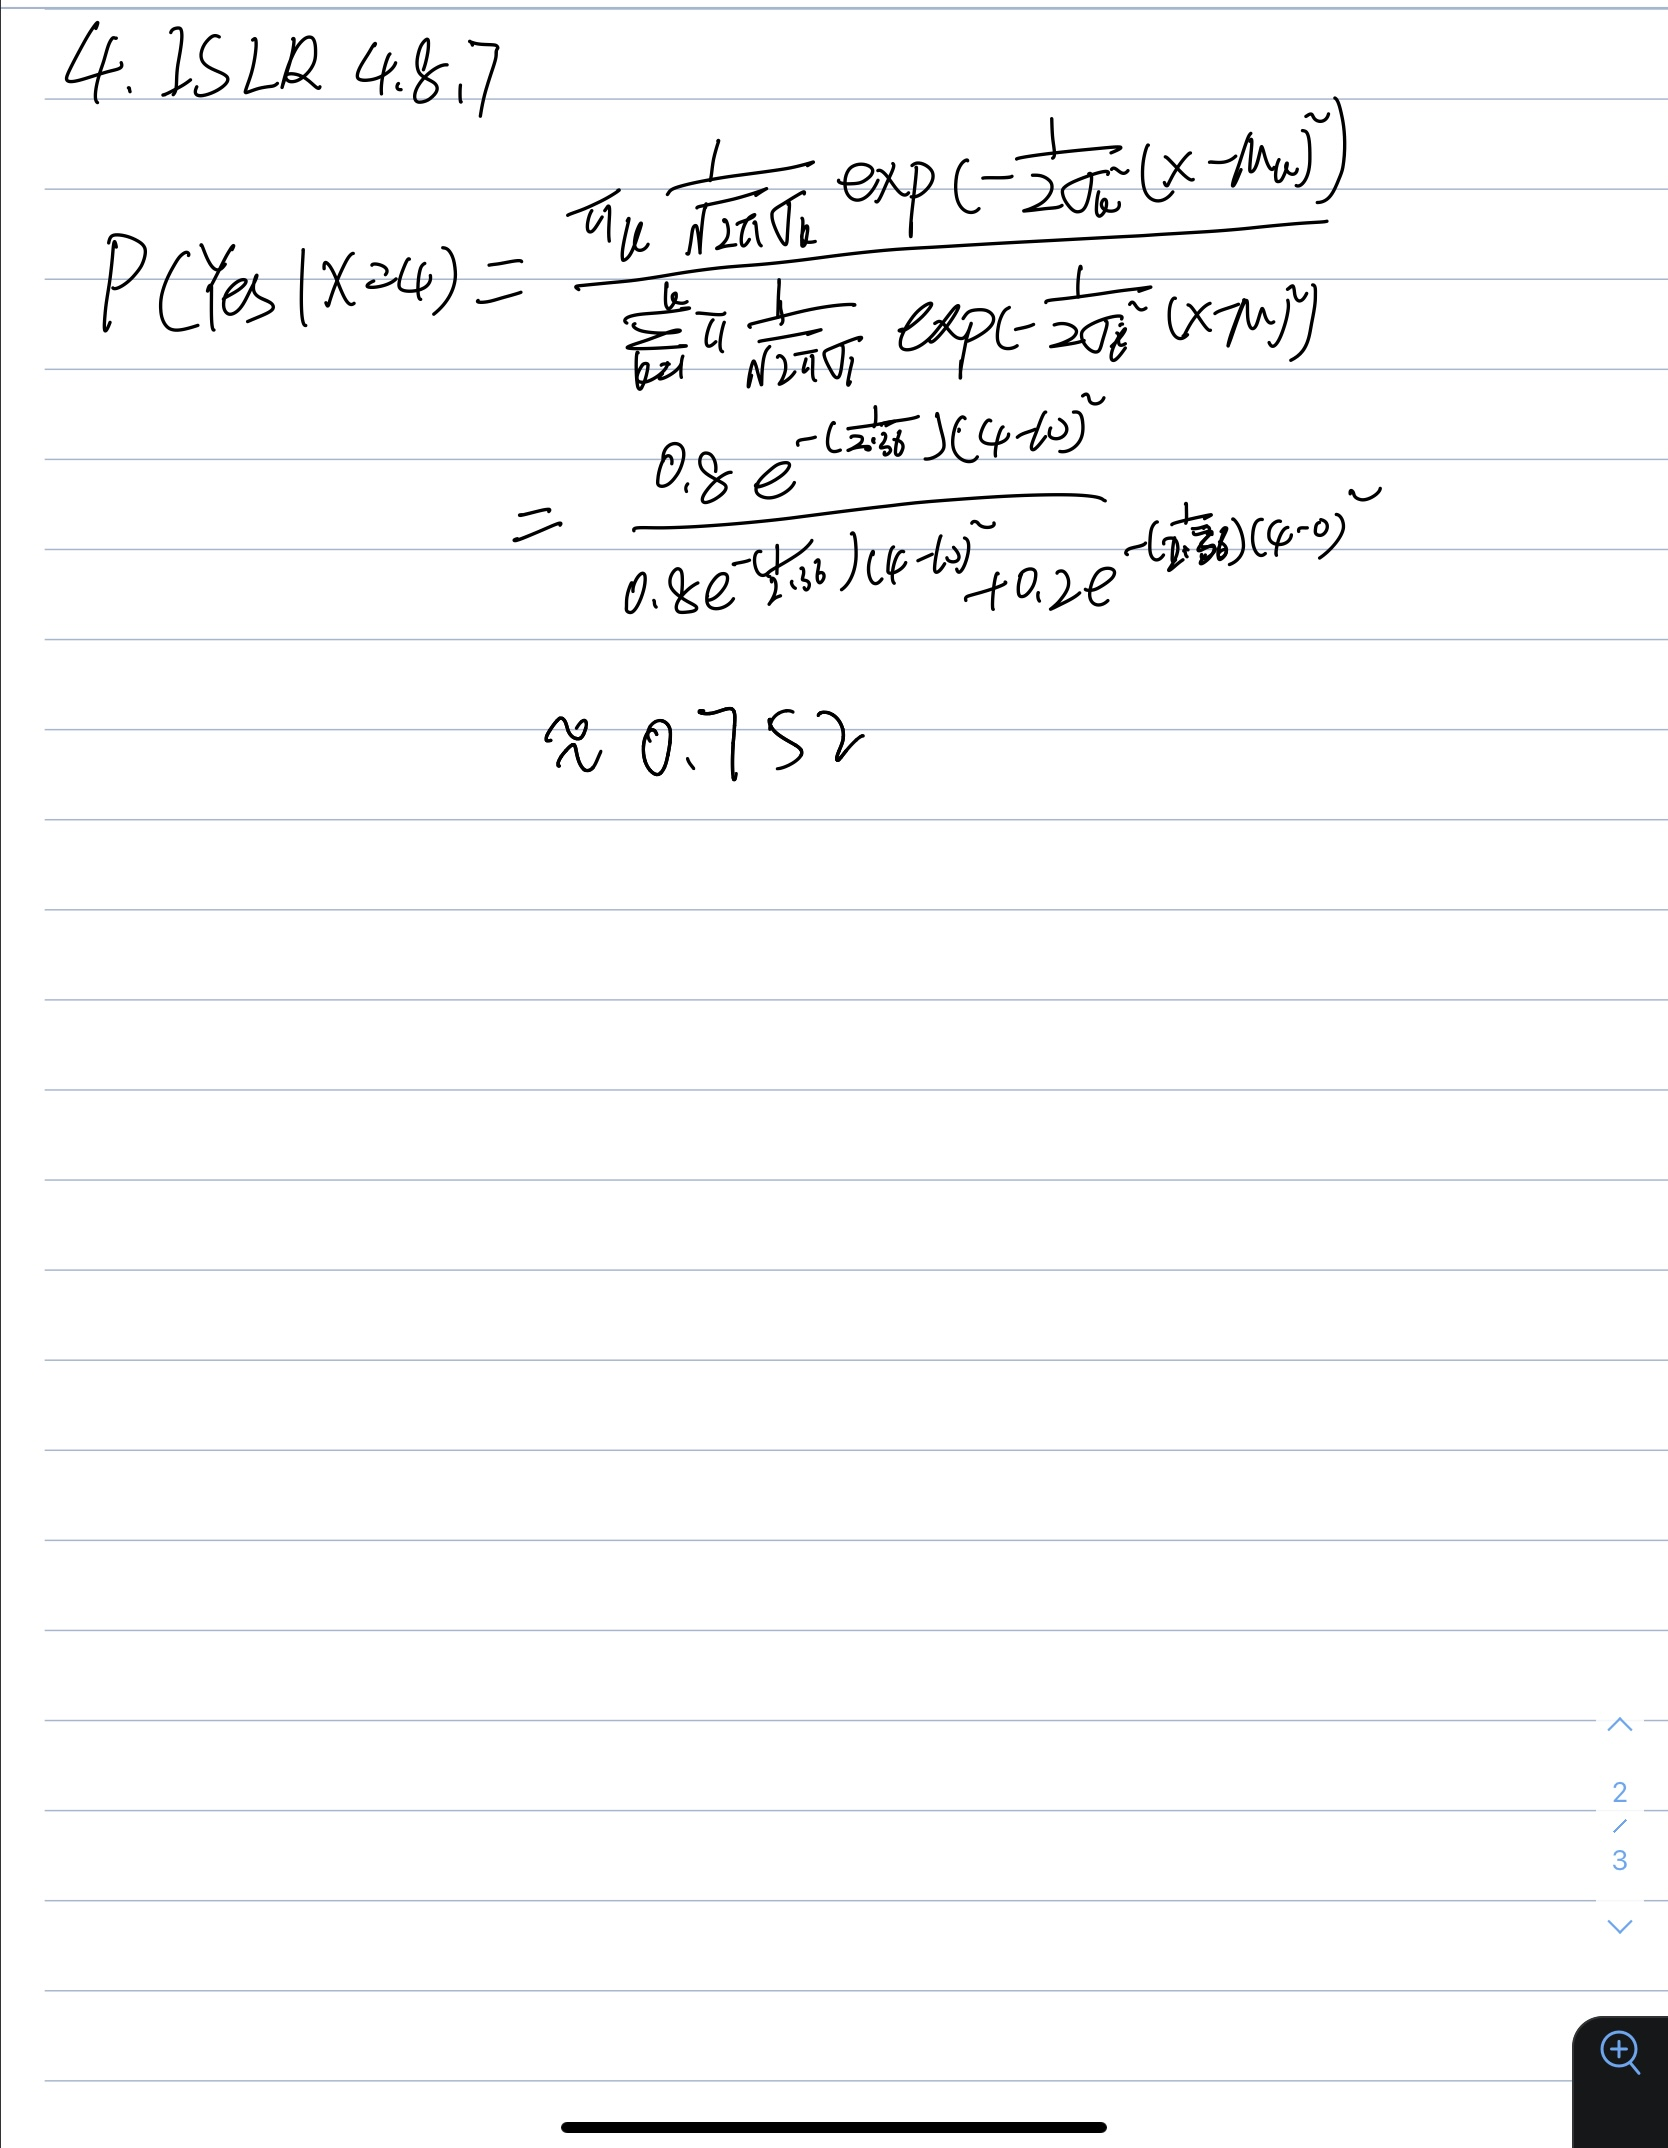